<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/Assignments/M8_AST_08_Finance_Portfolio_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 08: Finance Portfolio

## Learning Objectives

At the end of the experiment, you will be able to

* understand portfolio optimization
* compute volatility, covariance, correlation, and expected returns for a portfolio of two company stocks
* optimize a portfolio comprised of four company stocks

## Information

**Portfolio optimization** is the process of creating a portfolio of assets, for which the investment has the maximum return and minimum risk.

A **portfolio** is the investment in different kinds of assets from different companies. For example, if we have investments in 3 companies, say, Google, Amazon and Tesla, then these 3 companies make up our investment portfolio.

Usually, when we build a portfolio of assets from different companies, for all assets, we will get a profit after a specified period of time. However, the profit may not be the same for each investment we make. This profit is termed as **returns**.

When the company whose stocks we have purchased goes bankrupt, instead of gaining profits, we will also lose the capital investment. This is termed as a **risk** of investment.

Modern Portfolio Theory is a mathematical process that allows us to maximize returns for a given risk level.

**Efficient frontier** is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

### Setup Steps:

In [47]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [48]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M8_AST_08_Finance_Portfolio_C" #name of the notebook

def setup():

    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")

Setup completed successfully


### Import required packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

Let's see some fundamental statistical terms required in the portfolio optimization process through the below example.

**Example 1:** Consider a portfolio made up of stocks from just 2 companies, Tesla and Facebook. Calculate the volatility, covariance, correlation, and expected returns for this portfolio.

In the below code cell we pull the required stock price data from Yahoo and the dates for which we will be pulling the data is from 1st January 2018 to 31st December 2019.

In [5]:
# Read data
dt = yf.download("TSLA META", start='2018-01-01', end='2019-12-31')
dt.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price            Close                   High                    Low  \
Ticker            META       TSLA        META       TSLA        META   
Date                                                                   
2018-01-02  180.568970  21.368668  180.728223  21.474001  176.717128   
2018-01-03  183.803726  21.150000  183.913211  21.683332  180.479398   
2018-01-04  183.465317  20.974667  185.336503  21.236668  183.236400   
2018-01-05  185.973511  21.105333  186.023264  21.149332  184.062504   
2018-01-08  187.396790  22.427334  188.013876  22.468000  185.455940   

Price                        Open               Volume             
Ticker           TSLA        META       TSLA      META       TSLA  
Date                                                               
2018-01-02  20.733334  176.846508  20.799999  18151900   65283000  
2018-01-03  21.036667  181.026821  21.400000  16886600   67822500  
2018-01-04  20.378668  184.032635  20.858000  13880900  149194500  
2018-01-05  20.799999  184.719412  21.108000  13574500   68868000  
2018-01-08  21.033333  186.321854  21.066668  17994700  147891000

As we can see, there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘Close’ column. This column gives us the closing price of the company’s stock on the given day.

In [6]:
# Closing price
test = dt['Close']
test.head()

Ticker,META,TSLA
Date,,
2018-01-02,180.568970,21.368668
2018-01-03,183.803726,21.150000
2018-01-04,183.465317,20.974667
2018-01-05,185.973511,21.105333
2018-01-08,187.396790,22.427334


**Calculate the percentage change in stock prices**

Now, we calculate the percentage change in stock prices of Tesla every day by taking the log of percentage change as  the log of the returns is time additive.

It is common practice in portfolio optimization to take the log of returns for calculations of covariance and correlation.

Here, we use pandas' `pct_change()` function to compute percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

To know more about pct_change() function, click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html).

In [7]:
# Log of percentage change for Tesla
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

,TSLA
Date,
2018-01-02,NaN
2018-01-03,-0.010286
2018-01-04,-0.008325
2018-01-05,0.006210
2018-01-08,0.060755


In [8]:
# Variance for Tesla
var_tesla = tesla.var()
var_tesla

0.001150535895973198

Similarly for Facebook:

In [9]:
# Log of Percentage change for Facebook
fb = test['META'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

,META
Date,
2018-01-02,NaN
2018-01-03,0.017756
2018-01-04,-0.001843
2018-01-05,0.013579
2018-01-08,0.007624


In [10]:
# Variance for Facebook
var_fb = fb.var()
var_fb

0.0004578568025195689

**Volatility**

Volatility is measured as the annual standard deviation of a company’s stock. From the square root of variance, we get only the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250 as there are 250 trading days in a year.

**Note:** This volatility is for individual stocks and is different from the  Volatility of a portfolio we saw in the previous assignment.

In [11]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5363151815801036, 0.3383255837649471)

Let's plot the volatility of both Tesla and Facebook for better visualization.

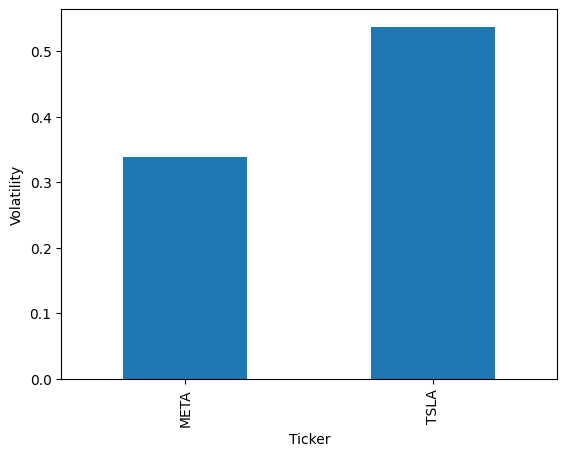

In [12]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.ylabel("Volatility")
plt.show()

**Covariance and Correlation**

Covariance measures the directional relationship between the returns on two assets. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

In [13]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Ticker,META,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.017756,-0.010286
2018-01-04,-0.001843,-0.008325
2018-01-05,0.013579,0.006210
2018-01-08,0.007624,0.060755


In [14]:
# Covariance
test1.cov()

Ticker,META,TSLA
Ticker,,
META,0.000458,0.000183
TSLA,0.000183,0.001151


We can see that there is small positive covariance between Tesla and Facebook.

In [15]:
# Correlation
test1.corr()

Ticker,META,TSLA
Ticker,,
META,1.000000,0.252024
TSLA,0.252024,1.000000


In line with the covariance, the correlation between Tesla and Facebook is also positive.

**Expected Returns**

Expected returns of an asset are simply the mean of percentage change in its stock prices.

For expected returns, we need to define weights for the assets chosen. In simpler terms, this means we need to decide what percentage of the total money we want to hold in each company’s stock.

Usually, this decision is done by using optimization techniques but for now, we will consider random weights for Tesla and Facebook.

In [16]:
# Log of percentage change
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Ticker,META,TSLA
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.017756,-0.010286
2018-01-04,-0.001843,-0.008325
2018-01-05,0.013579,0.006210
2018-01-08,0.007624,0.060755


Let’s define an array of random weights for the purpose of calculation that will represent the percentage allocation of investments between these two stocks. They must add up to 1.

In [17]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

,0
Ticker,
META,0.000238
TSLA,0.000514


The formula for the expected return on a portfolio is given by:

$$E(r) = (w_a * r_a) + (w_b * r_b)$$

where, $w$ is the weight of asset and

$r$ is the return of asset.

In [18]:
# Total expected return
e_r = (e_r_ind * w).sum()
e_r

0.0004589345247814641

### Building an Optimal Risk Portfolio

Now we create an optimal portfolio using the above concepts.

**Example 2:** Consider stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years,

* calculate the weights of each asset
* calculate the expected returns, minimum variance portfolio, optimal risk portfolio and efficient frontier
* calculate the highest Sharpe ratio

Let’s start by pulling the required asset data from Yahoo.

In [19]:
#Download the required asset data from Yahoo
tickers = ['AAPL', 'NKE', 'GOOGL', 'AMZN']
df_ = yf.download(tickers, start='2015-01-01', end='2019-12-31')
df_.head()

[*********************100%***********************]  4 of 4 completed


Price           Close                                      High           \
Ticker           AAPL     AMZN      GOOGL        NKE       AAPL     AMZN   
Date                                                                       
2015-01-02  24.320425  15.4260  26.351517  42.140316  24.789794  15.7375   
2015-01-05  23.635288  15.1095  25.849415  41.461864  24.169168  15.4190   
2015-01-06  23.637510  14.7645  25.211468  41.217949  23.897776  15.1500   
2015-01-07  23.968962  14.9210  25.137320  42.069363  24.069063  15.0640   
2015-01-08  24.889900  15.0230  25.224903  43.040504  24.947738  15.1570   

Price                                   Low                                 \
Ticker          GOOGL        NKE       AAPL     AMZN      GOOGL        NKE   
Date                                                                         
2015-01-02  26.662530  42.991724  23.879974  15.3480  26.268412  41.732350   
2015-01-05  26.273886  41.927480  23.448431  15.0425  25.764323  41.297790   
2015-01-06  25.936500  41.750082  23.274916  14.6190  25.157226  40.827721   
2015-01-07  25.452811  42.260043  23.735389  14.7665  25.062678  41.284468   
2015-01-08  25.254262  43.058243  24.180285  14.8055  24.633230  42.401950   

Price            Open                                    Volume            \
Ticker           AAPL     AMZN      GOOGL        NKE       AAPL      AMZN   
Date                                                                        
2015-01-02  24.778671  15.6290  26.503289  42.814350  212818400  55664000   
2015-01-05  24.089086  15.3505  26.232086  41.909742  257142000  55484000   
2015-01-06  23.699796  15.1120  25.901169  41.634786  263188400  70380000   
2015-01-07  23.846614  14.8750  25.425941  41.510625  160423600  52806000   
2015-01-08  24.298185  15.0160  24.956187  42.419688  237458000  61768000   

Price                          
Ticker         GOOGL      NKE  
Date                           
2015-01-02  26480000  4985800  
2015-01-05  41182000  6889200  
2015-01-06  54456000  7576000  
2015-01-07  46918000  7256000  
2015-01-08  73054000  5978200

In [20]:
# Keep the ‘Close’ column to perform calculations
df = df_['Close']
df.head()

Ticker,AAPL,AMZN,GOOGL,NKE
Date,,,,
2015-01-02,24.320425,15.4260,26.351517,42.140316
2015-01-05,23.635288,15.1095,25.849415,41.461864
2015-01-06,23.637510,14.7645,25.211468,41.217949
2015-01-07,23.968962,14.9210,25.137320,42.069363
2015-01-08,24.889900,15.0230,25.224903,43.040504


Covariance and Correlation matrix

In [21]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,AMZN,GOOGL,NKE
Ticker,,,,
AAPL,0.000246,0.000142,0.000122,0.000084
AMZN,0.000142,0.000334,0.000176,0.000092
GOOGL,0.000122,0.000176,0.000222,0.000085
NKE,0.000084,0.000092,0.000085,0.000219


In [22]:
# Correlation matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Ticker,AAPL,AMZN,GOOGL,NKE
Ticker,,,,
AAPL,1.000000,0.496660,0.524875,0.360850
AMZN,0.496660,1.000000,0.647941,0.341554
GOOGL,0.524875,0.647941,1.000000,0.387465
NKE,0.360850,0.341554,0.387465,1.000000


**Portfolio Variance**

The formula for calculating portfolio variance is given as,

$$\sigma^2(r_p) = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j Cov(r_i, r_j) $$

Here, $w_i$ and $w_j$ denote weights of all assets from $1$ to $n$ (in this case from 1 to 4) and $Cov(r_i, r_j)$ is the covariance of the two assets denoted by $i$ and $j$.

The simplest way to do this complex calculation is by defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

Let’s define a random list of weights for all 4 assets.

In [23]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0001609211739710543

Thus we have found the portfolio variance. But for truly optimizing the portfolio, the random weights won't work. We need to calculate it according to what gives us maximum expected returns.

**Portfolio expected returns**

The mean of returns (given by the change in prices of asset stock prices) gives us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us the expected return for the portfolio.

Note that we use the `resample()` function to get yearly returns. The argument to the function, ‘Y’, denotes yearly. If we don't perform resampling, we will get daily returns.

In [24]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

,0
Ticker,
AAPL,0.357854
AMZN,0.295745
GOOGL,0.155478
NKE,0.160666


In [25]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20480652420904166

**Plotting the efficient frontier**

Below, we can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, let's take a look at the volatility and returns of individual assets.

In [26]:
# Volatility is given by the annual standard deviation
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
Ticker,
AAPL,0.247871
AMZN,0.288770
GOOGL,0.235375
NKE,0.233916


In [27]:
# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Ticker,,
AAPL,0.357854,0.247871
AMZN,0.295745,0.288770
GOOGL,0.155478,0.235375
NKE,0.160666,0.233916


From the above results, we can see that Amazon has the maximum risk attached but it also offers a higher return.

In order to plot the efficient frontier graph, we need to do this process for several iterations. In each iteration, we consider different weights for assets and calculate the return and volatility of that particular portfolio combination.

In [28]:
# Define an empty list for portfolio returns, volatility and asset weights
p_ret = []
p_vol = []
p_weights = []

num_assets = len(df.columns)
print("Number of assets: ", num_assets)
num_portfolios = 10000
print("Number of portfolios: ", num_portfolios)

Number of assets:  4
Number of portfolios:  10000


In [29]:
np.random.seed(1)
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    # sum of weights must be 1
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    # Returns are the product of individual expected returns of asset and its weights
    returns = np.dot(weights, ind_er)
    p_ret.append(returns)
    # Portfolio Variance
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    # Daily standard deviation
    sd = np.sqrt(var)
    # Annual standard deviation = volatility
    ann_sd = sd * np.sqrt(250)
    p_vol.append(ann_sd)

In [30]:
data_ = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    print(counter, symbol)
    data_[symbol + '_weight'] = [w[counter] for w in p_weights]

# Create dataframe of the 10000 portfolios
portfolios  = pd.DataFrame(data_)
portfolios.head()

0 AAPL
1 AMZN
2 GOOGL
3 NKE


,Returns,Volatility,AAPL_weight,AMZN_weight,GOOGL_weight,NKE_weight
0,0.285359,0.214801,0.289640,0.500297,0.000079,0.209983
1,0.213130,0.187901,0.190366,0.119778,0.241609,0.448247
2,0.233630,0.193150,0.194494,0.264126,0.205488,0.335892
3,0.249852,0.210469,0.114833,0.493207,0.015383,0.376577
4,0.280125,0.210816,0.317467,0.425026,0.106800,0.150707


We can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give the efficient frontier for our portfolio.

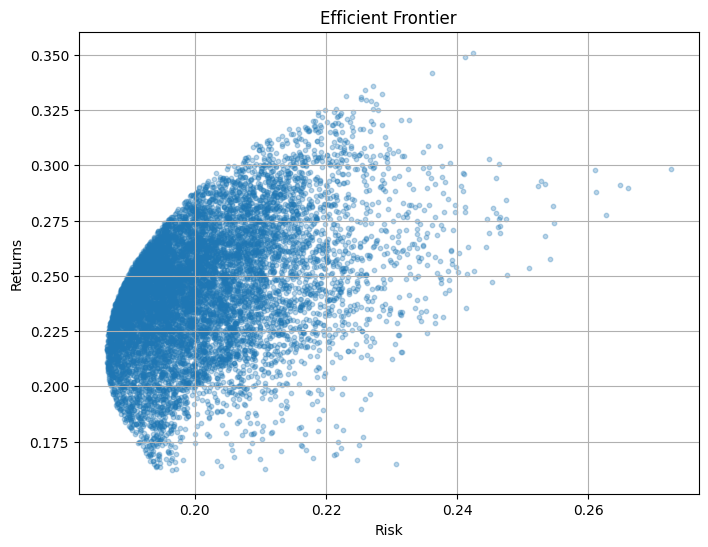

In [31]:
# Visualize efficient frontier
plt.figure(figsize=(8,6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.grid()
plt.show()

Each point on the line (left edge) represents an optimal portfolio of stocks that maximizes the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, we can also see the combination of weights that will give all possible combinations: minimum volatility (left most point), maximum returns (top most point), and everything in between.

**Minimum Variance Portfolio**

In [32]:
# Minimum variance portfolio
min_var_port = portfolios.iloc[np.argmin(portfolios['Volatility'])]
min_var_port

,5052
Returns,0.216495
Volatility,0.186598
AAPL_weight,0.258258
AMZN_weight,0.047768
GOOGL_weight,0.298488
NKE_weight,0.395487


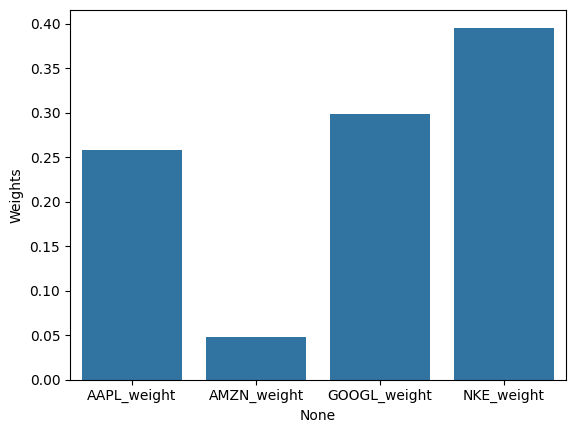

In [33]:
# Weights for Minimum variance portfolio
sns.barplot(x = min_var_port[2:].index, y = min_var_port[2:])
plt.ylabel("Weights")
plt.show()

The minimum volatility is in a portfolio where the weights of Apple, Amazon, Google and Nike are about 25%, 4%, 30% and 40% respectively. This point can be plotted on the efficient frontier graph as shown:

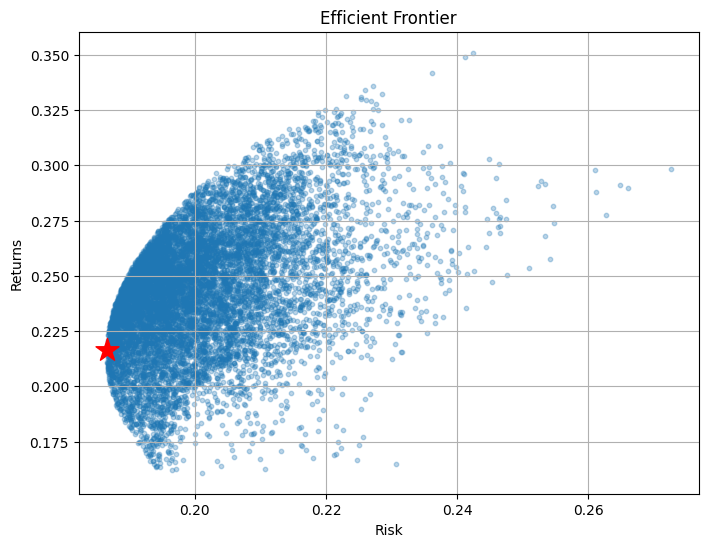

In [34]:
# Visualize Efficient frontier
plt.subplots(figsize=[8,6])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)

# Visualize Minimum variance portfolio
plt.scatter(min_var_port[1], min_var_port[0], color='r', marker='*', s=300)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.grid()
plt.show()

The red star denotes the most efficient portfolio with minimum volatility. Note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but we will notice that the return on this portfolio is pretty low. We want to maximize the return, even if it is a tradeoff with some level of risk. This is where a parameter called the Sharpe Ratio comes in.

The Sharpe ratio is the average return earned ($E(r_p)$) in excess of the risk-free rate ($r_f$) per unit of volatility ($\sigma_p$) or total risk.

$$Sharpe\ ratio = \frac{E(r_p) - r_f}{\sigma_p}$$

**Tangency Portfolio**

A tangency portfolio or an optimal risky portfolio can be considered as one that has the highest Sharpe ratio.

Let's find the optimal portfolio for our case:

In [35]:
# Risk-free return
rf = 0.01
# Sharpe ratios for different weight combinations
sharpe_ratios = (portfolios['Returns'] - rf)/portfolios['Volatility']

# Highest sharpe ratio
optimal_idx = np.argmax(sharpe_ratios)
print("Highest Sharpe ratio: ", sharpe_ratios[optimal_idx])

Highest Sharpe ratio:  1.4411312098421374


In [36]:
# Tangent portfolio
optimal_risky_port = portfolios.iloc[optimal_idx]
optimal_risky_port

,1278
Returns,0.331367
Volatility,0.222996
AAPL_weight,0.714299
AMZN_weight,0.221448
GOOGL_weight,0.012225
NKE_weight,0.052028


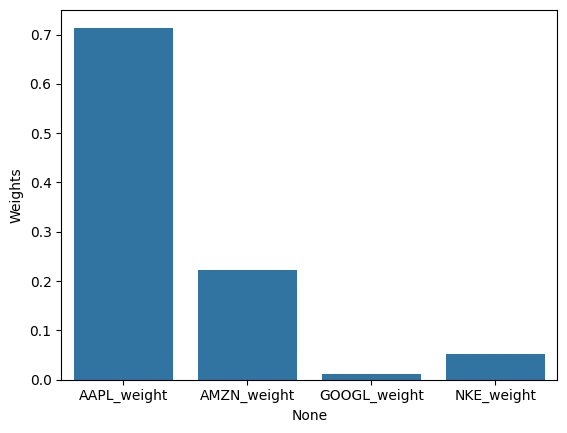

In [37]:
# Weights for Tangency portfolio
sns.barplot(x = optimal_risky_port[2:].index, y = optimal_risky_port[2:])
plt.ylabel("Weights")
plt.show()

In [38]:
# Diference b/w tangent portfolio and minimum variance portfolio
optimal_risky_port - min_var_port

,0
Returns,0.114872
Volatility,0.036399
AAPL_weight,0.456041
AMZN_weight,0.173681
GOOGL_weight,-0.286263
NKE_weight,-0.343459


From the above results, we can notice that the difference in risk between minimum volatility portfolio and optimal risky portfolio is low while the difference in returns is high.

We can also plot this point on efficient frontier graph.

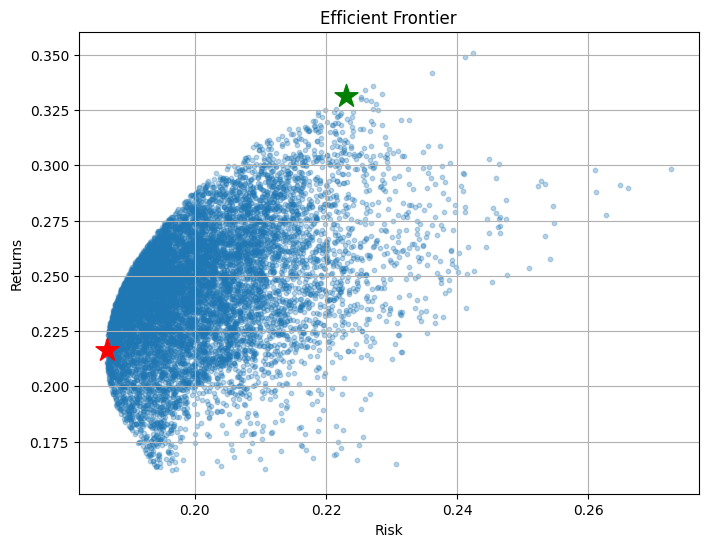

In [39]:
# Visualize Efficient frontier
plt.subplots(figsize=[8,6])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)

# Visualize Minimum variance portfolio
plt.scatter(min_var_port[1], min_var_port[0], color='r', marker='*', s=300)

# Visualize optimal or tangent portfolio
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=300)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.grid()
plt.show()

In the above plot, the green star represents the optimal risky portfolio.

### Please answer the questions below to complete the experiment:




In [40]:
#@title The tangency portfolio is defined as the portfolio that has the { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Highest Sharpe ratio" #@param ["", "Highest returns", "Lowest variance", "Highest Sharpe ratio"]

In [41]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [42]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}

In [43]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [44]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [45]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [46]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9159
Date of submission:  15 Mar 2025
Time of submission:  15:24:48
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
